# Статический режим

In [4]:
import pandas as pd
import matplotlib.pyplot as plt; import matplotlib.ticker as ticker
import numpy as np
import scipy
from scipy.optimize import curve_fit
plt.rc('xtick',labelsize=20); plt.rc('ytick',labelsize=20)
df = pd.read_excel("1_3_data.xlsx")
#print(df)

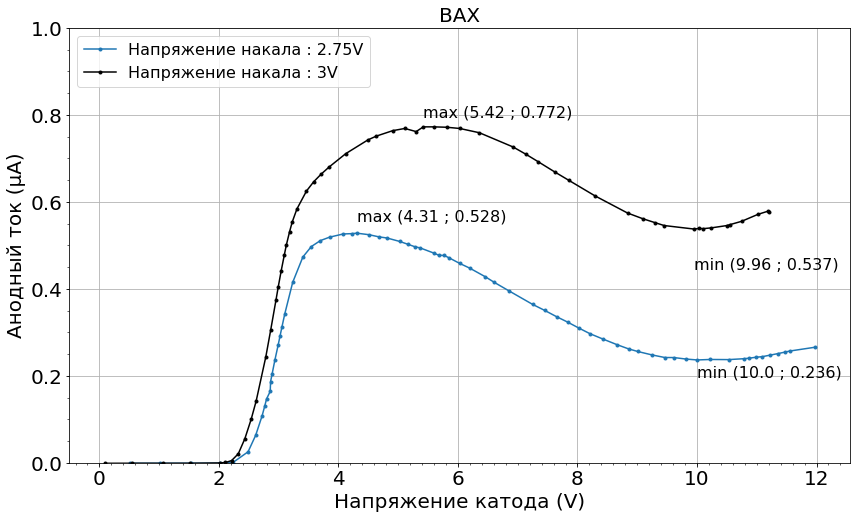

In [6]:
fig, ax = plt.subplots(1, figsize = (14,8))

R = 100

c1 = df['катод1'].values.tolist()
a1 = df['анод1'].values.tolist()
a1 = [x/R for x in a1]

c2 = df['катод2'].values.tolist()
a2 = df['анод2'].values.tolist()
a2 = [x/R for x in a2]

c2 = [x for x in c2 if str(x) != 'nan']
a2 = [x for x in a2 if str(x) != 'nan']


n = len(c2)
for i in range(n):
        already_sorted = True

        for j in range(n - i - 1):
            if c2[j] > c2[j + 1]:
                c2[j], c2[j + 1] = c2[j + 1], c2[j]
                a2[j], a2[j + 1] = a2[j + 1], a2[j]

                already_sorted = False
        if already_sorted:
            break

i_min1 = 0
i_min2 = 0
            
i_max1 = np.argmax(a1)
txt1 = "max ("+str(round(c1[i_max1],2))+" ; "+str(round(a1[i_max1],3))+")"
ax.text(c1[i_max1],1.05*a1[i_max1],txt1, size = 16)


i_max2 = np.argmax(a2)
txt2 = "max ("+str(round(c2[i_max2],2))+" ; "+str(round(a2[i_max2],3))+")"
ax.text(c2[i_max2],1.03*a2[i_max2],txt2, size = 16)

i_min1 = np.argmin(a1[i_max1:])
txt3 = "min ("+str(round(c1[i_max1+i_min1],2))+" ; "+str(round(a1[i_max1+i_min1],3))+")"
ax.text(c1[i_max1+i_min1],0.83*a1[i_max1+i_min1],txt3, size = 16)

i_min2 = np.argmin(a2[i_max2:])
txt4 = "min ("+str(round(c2[i_max2+i_min2],2))+" ; "+str(round(a2[i_max2+i_min2],3))+")"
ax.text(c2[i_max2+i_min2],0.83*a2[i_max2+i_min2],txt4, size = 16)



ax.plot(c1,a1,marker='.',label='Напряжение накала : 2.75V')
ax.plot(c2,a2,marker='.',label='Напряжение накала : 3V',color = 'k')
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.2));
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05));
ax.set_ylabel('Анодный ток (μA)',fontsize='20')
ax.set_xlabel('Напряжение катода (V)',fontsize='20')
ax.set_title('ВАХ',fontsize='20')
ax.set_ylim([0,1])
plt.grid()
plt.legend(fontsize='16',loc='upper left')

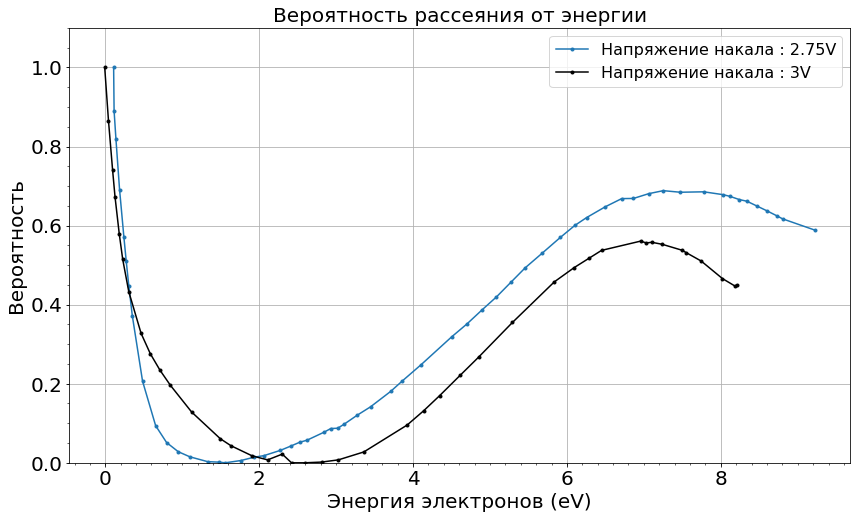

In [7]:
v1 = 2.75
w1 = [-np.log(i) for i in a1[10:]]
w1 = [i - min(w1) for i in w1]
w1 = [i/max(w1) for i in w1]
E1 = [j-v1 for j in c1[10:]]

v2 = 3
w2 = [-np.log(i) for i in a2[14:]]
w2 = [i - min(w2) for i in w2]
w2 = [i/max(w2) for i in w2]
E2 = [j-v2 for j in c2[14:]]


fig1, ax1 = plt.subplots(1, figsize = (14,8))



ax1.plot(E1,w1,marker='.',label='Напряжение накала : 2.75V')
ax1.plot(E2,w2,marker='.',label='Напряжение накала : 3V',color='k')
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.2));
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.05));
ax1.set_ylabel('Вероятность',fontsize='20')
ax1.set_xlabel('Энергия электронов (eV)',fontsize='20')
ax1.set_title('Вероятность рассеяния от энергии',fontsize='20')
ax1.set_ylim([0,1.1])
plt.grid()
plt.legend(fontsize='16',loc='upper right')

<font size="5">
    <br><br><br><br>
    Оценим размер электронной оболочки с помощью формулы :<br><br>
        $\large l = \frac{h}{2\sqrt{2m(E_{1} + U_{0})}}\,$ <br>где $E_{1}$ - энергия электронов, соответствуая максимуму и $U_{0} = 2.5V$<br><br>
        $\large l \approx 276-300 pm$

In [152]:
h = 6.63 * 10**(-34)
m = 9.1 * 10**(-31)
e = 1.6 * 10**(-19)
U0 = 2.5

E1 = 4.31-2.75
l = (h/2)/np.sqrt(2*m*(E1+U0)*e)
#print(l)

E1 = 5.42-3
l = (h/2)/np.sqrt(2*m*(E1+U0)*e)
#print(l)

<font size="5">
    Оценим размер электронной оболочки с помощью формулы :<br><br>
        $\large l = \frac{h}{4} \sqrt{\frac{5}{2m(E_{2} - E_{1})}}\,$ 
        где $E_{1},E_{2}$ - энергии электронов, соответствующие максимуму и минимуму 
 <br><br>
 $\large l \approx 287-322 pm$

In [142]:
E2 = 10
E1 = 4.31
l = (h/4)*np.sqrt(5/(2*m*(E2-E1)*e))
#print(l)
E2 = 9.96
E1 = 5.42
l = (h/4)*np.sqrt(5/(2*m*(E2-E1)*e))
#print(l)

<font size="5">
    Ковалентный диаметр ксенона (табличный) $\approx 260 pm$

<font size="5">
    Глубина потенциальной ямы : $\large U_{0} = \frac{4E_{2} - 9E_{1}}{5} \approx  (1.2 - 3) eV$

In [21]:
E2 = 10-2.75
E1 = 4.31-2.75
U0 = (4*E2 - 9*E1)/5
#print(U0)

E2 = 9.96-3
E1 = 5.42-3
U0 = (4*E2 - 9*E1)/5
#print(U0)

<font size="5">
    Напряжение пробоя $\approx$ 12V, что совпадает с ионизационным потенциалом ксенона.

<font size="5">
    Зависимость $E_{n} = f(E_{1},n)$<br>
    $\large\sqrt{\frac{2m(E_{n}+U_{0})}{\hbar^{2}}} l = nπ $

<font size="5">
    $\large E_{n} = \frac{(nπ/l)^{2} \hbar^{2}}{2m} - U_{0} = \frac{(n/l)^{2} h^{2}}{8m} - U_{0}$<br>
    Приняв $U_{0} = 2.5eV$ и $l \approx 296pm$<br>
    $E_{1} \approx 1.7 eV\,\,$
    $E_{2} \approx 14.3 eV\,\,$
    $E_{3} \approx 25.2 eV\,\,$

In [192]:
U0 = 2.5
l = 300 * 10**(-12)
e = 1.6 * 10**(-19)

E1 = h*h/(8*m*l*l*e) - U0
#print(E1)
E2 = 4*h*h/(8*m*l*l*e) - U0
#print(E2)
E3 = 9*h*h/(8*m*l*l*e) - U0
#print(E3)

# Динамический режим

<font size="5">
    Ток накала : 2.75V
<img src="pontos.jpg" style="width:300px;height:300px">

In [13]:
x = [1,2,3,3.5,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
R = 100 * 10**3
I0 = (10**6) * (20 * 10**(-3))/(5*R) 
y = [0.75,1.6,6,7,6.5,6,4.5,4,3,2.7,2.5,2.2,2.7,3,3.5,4,5.7,8,10,12,13]
y = [i*I0 for i in y]

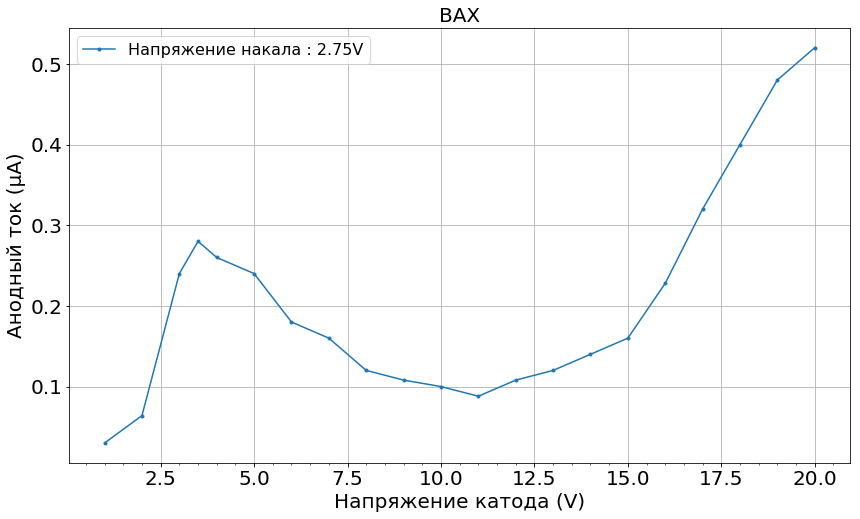

In [14]:
fig2, ax2 = plt.subplots(1, figsize = (14,8))
ax2.plot(x,y,marker='.',label='Напряжение накала : 2.75V')
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.5));
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.1));
ax2.set_ylabel('Анодный ток (μA)',fontsize='20')
ax2.set_xlabel('Напряжение катода (V)',fontsize='20')
ax2.set_title('ВАХ',fontsize='20')
#ax2.set_ylim([0,1])
plt.grid()
plt.legend(fontsize='16',loc='upper left')

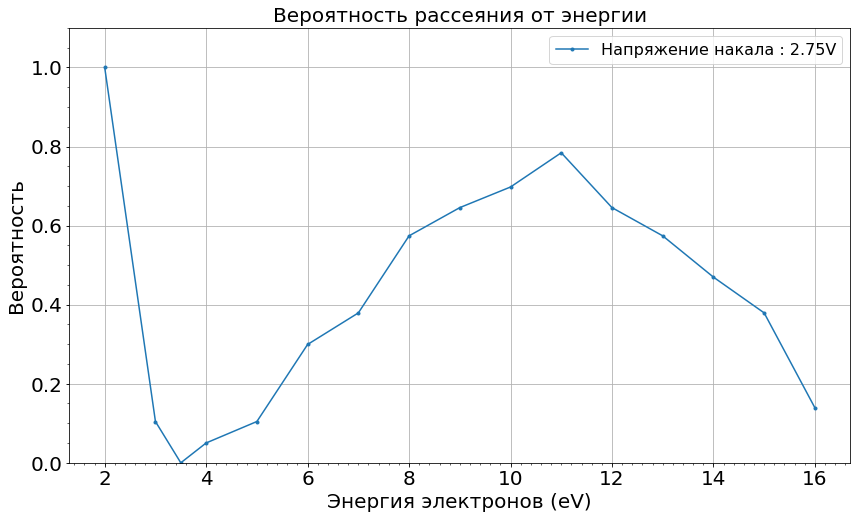

In [26]:
v = 2.75
w = [-np.log(i) for i in y[1:-4]]
w = [i - min(w) for i in w]
w = [i/max(w) for i in w]
E = [j for j in x[1:-4]]

fig3, ax3 = plt.subplots(1, figsize = (14,8))

ax3.plot(E,w,marker='.',label='Напряжение накала : 2.75V')
ax3.xaxis.set_minor_locator(ticker.MultipleLocator(0.2));
ax3.yaxis.set_minor_locator(ticker.MultipleLocator(0.05));
ax3.set_ylabel('Вероятность',fontsize='20')
ax3.set_xlabel('Энергия электронов (eV)',fontsize='20')
ax3.set_title('Вероятность рассеяния от энергии',fontsize='20')
ax3.set_ylim([0,1.1])
plt.grid()
plt.legend(fontsize='16',loc='upper right')

<font size="5">
    Оценим размер электронной оболочки с помощью формулы :<br>
        $\large l = \frac{h}{2\sqrt{2m(E_{1} + U_{0})}}\,$ <br>где $E_{1}$ - энергия электронов, соответствуая максимуму и $U_{0} = 2.5V$<br><br>
        $\large l \approx 340 pm$

In [16]:
h = 6.63 * 10**(-34)
m = 9.1 * 10**(-31)
e = 1.6 * 10**(-19)
U0 = 2.5

E1 = 3.5 - 2.75
l = (h/2)/np.sqrt(2*m*(E1+U0)*e)
#print(l)

<font size="5">
    Оценим размер электронной оболочки с помощью формулы :<br>
        $\large l = \frac{h}{4} \sqrt{\frac{5}{2m(E_{2} - E_{1})}}\,$ 
        где $E_{1},E_{2}$ - энергии электронов, соответствующие максимуму и минимуму 
 <br>
 $\large l \approx 250 pm$

In [18]:
E2 = 11
E1 = 3.5
l = (h/4)*np.sqrt(5/(2*m*(E2-E1)*e))
#print(l)